# QF 627 Programming and Computational Finance
### Lesson 06 | Trading Strategies `Part 2` & Some Mathematical Tools | `xzj`view

> Hi Team, 👋 

> This week’s lesson focuses on `two` topics.

> First, as a continuation of last week’s lesson on algorithmic trading strategies, we will have a quick `refresher` on simple moving averages (`SMA`) strategy. Then, we will learn about `time-series momentum strategy`, which focuses on a stock’s recent performance . Then, we will look at `mean-reversion strategies` (which uses the opposite reasoning of momentum strategies).

> Then, we will go through some `mathematical tools` that will be useful in the second half of the semester where, as discussed, you will learn `machine learning`, along with `NLP` (Natural Language Processing) and some `deep learning`, for predicting market movements.

> A good portion of current script is intended, as always, to give you a firm revision and consolidation of your learning in the previous lessons, certain cells will give you `reverse-engineering tasks`—which would contribute to facilitating your learning.

### Lesson Pointers 👉

* We will begin with a refresher and expand your learning on algorithmic trading strategies.
<br> 

    - [Simple Moving Averages](#sma)
    - [Time-series Momentum](#timeseries_momentum)
    - [Mean-Reversion](#mean_reversion)
    

* [Along the way, we will revisit and further improve your understanding of vectorization, using both NumPy and pandas.](#vectorization)
<br>

* [At the end, you will learn some useful mathematical tools.](#math_tools)

### Activation of necessary modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

#### Setting plotting and display options

In [2]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["legend.fontsize"] = 14

In [3]:
%matplotlib inline

<a id="sma"></a>
### Let’s obtain a historical exchange rate between USD and GBP

> A list of all the exchange rates that FRED (Federal Reserve Bank of St. Louis) has daily data for can be found [HERE](http://research.stlouisfed.org/fred2/categories/94).

In [4]:
USD_EUR = pdr.get_data_fred("DEXUSEU",
                            start = dt.datetime(2012, 10, 1),
                            end = dt.datetime(2021, 9, 27)).dropna()

In [5]:
USD_EUR

,DEXUSEU
DATE,
2012-10-01,1.290
2012-10-02,1.295
2012-10-03,1.291
2012-10-04,1.300
2012-10-05,1.306
...,...
2021-09-21,1.172
2021-09-22,1.174
2021-09-23,1.173


In [6]:
USD_EUR.rename(columns = {"DEXUSEU": "PRICE"},
               inplace = True)

In [7]:
USD_EUR["SMA_40"] = USD_EUR["PRICE"].rolling(window = 40).mean()
USD_EUR["SMA_250"] = USD_EUR["PRICE"].rolling(window = 250).mean()

USD_EUR

,PRICE,SMA_40,SMA_250
DATE,,,
2012-10-01,1.290,NaN,NaN
2012-10-02,1.295,NaN,NaN
2012-10-03,1.291,NaN,NaN
2012-10-04,1.300,NaN,NaN
2012-10-05,1.306,NaN,NaN
...,...,...,...
2021-09-21,1.172,1.179,1.195
2021-09-22,1.174,1.179,1.195
2021-09-23,1.173,1.178,1.195


<AxesSubplot:title={'center':'USD/GBP Simple Moving Averages (40 vs 250 Days)'}, xlabel='DATE'>

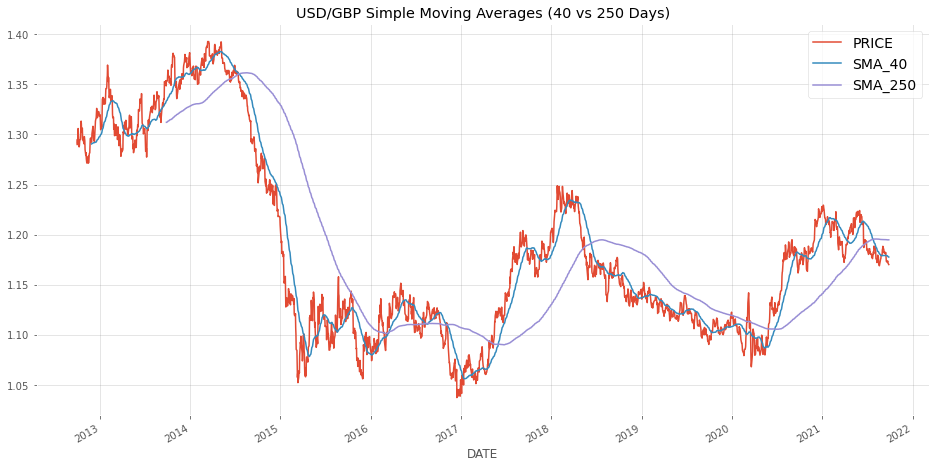

In [8]:
USD_EUR.plot(figsize = (16, 8),
             title = "USD/GBP Simple Moving Averages (40 vs 250 Days)")

In [9]:
USD_EUR["POSITIONS"] = np.where(USD_EUR["SMA_40"] < USD_EUR["SMA_250"],
                                -1, 1)

In [10]:
USD_EUR.dropna(inplace = True)

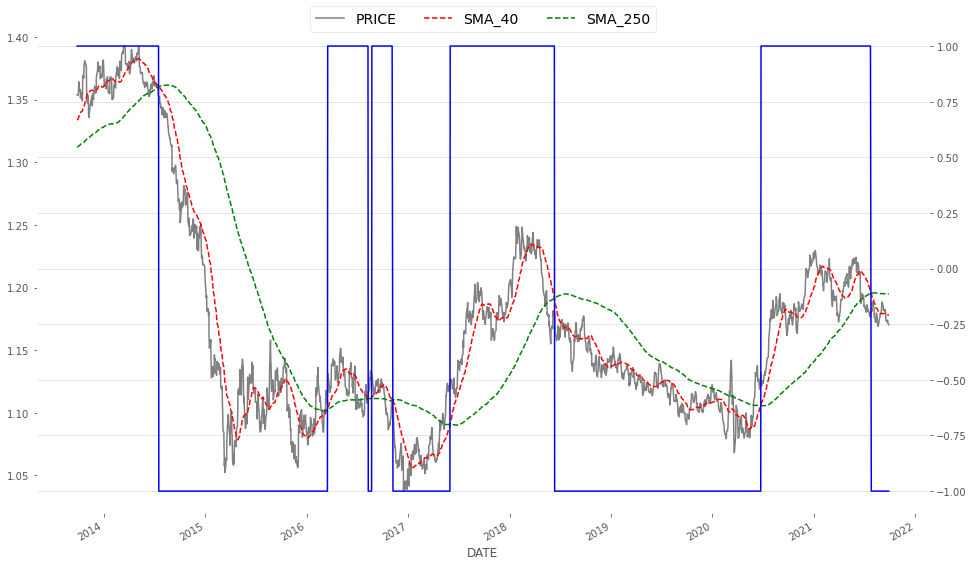

In [11]:
ax = USD_EUR[["PRICE",
              "SMA_40",
              "SMA_250",
              "POSITIONS"]].plot(secondary_y = "POSITIONS",
                                 figsize = (16, 10),
                                 style = ["grey",
                                          "r--",
                                          "g--",
                                          "blue"])

ax.legend(loc = "upper center",
          bbox_to_anchor = (0.5, 1.05),
          ncol = 3)

> To calculate the performance of the strategy, calculate the log returns based on the original financial time series. The code for this can be minimal, thanks to vectorization.

> Let’s calculate the log returns in vectorized fashion over the price column.

> To derive the strategy returns, multiply the position column—shifted by one trading day—with the returns column. Because log returns are additive, calculating the sum over the columns returns and strategy provides a first comparison of the performance of the strategy relative to the base investment itself.

In [12]:
USD_EUR["RETURNS"] = np.log(USD_EUR["PRICE"] / USD_EUR["PRICE"].shift(1))

USD_EUR

,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS
DATE,,,,,
2013-09-27,1.354,1.334,1.312,1,NaN
2013-09-30,1.353,1.334,1.312,1,-0.000
2013-10-01,1.353,1.335,1.313,1,-0.000
2013-10-02,1.359,1.336,1.313,1,0.004
2013-10-03,1.364,1.336,1.313,1,0.004
...,...,...,...,...,...
2021-09-21,1.172,1.179,1.195,-1,-0.000
2021-09-22,1.174,1.179,1.195,-1,0.001
2021-09-23,1.173,1.178,1.195,-1,-0.000


<AxesSubplot:>

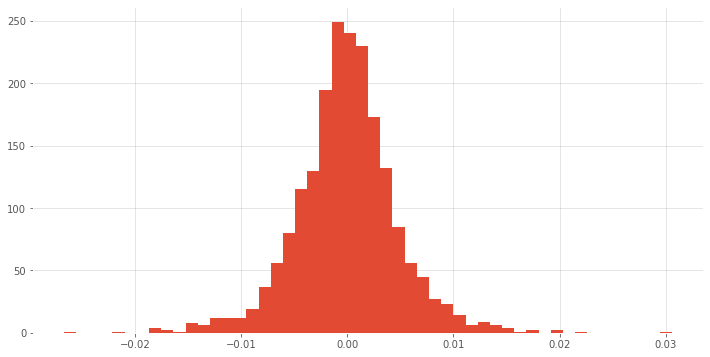

In [13]:
USD_EUR["RETURNS"].hist(bins = 50,
                        figsize = (12, 6))

> Wait! Wait a minute here. What do we mean by `vectorization`? I assume that you are familiar with vectorization as it was discussed in the assigned readings and also dealt with in our class, but in case you have questions, here’s a quick refresher.

<a id="vectorization"></a>
### A Refresher on `Vectorization`

#### with built-in Python

In [14]:
vector = [1,
          2,
          3,
          4,
          5]

vector

[1, 2, 3, 4, 5]

In [15]:
5 * vector

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [16]:
example = [5 * i for i in vector]

example

[5, 10, 15, 20, 25]

#### with NumPy

In [17]:
array = np.array(vector)
array

array([1, 2, 3, 4, 5])

In [18]:
5 * array

array([ 5, 10, 15, 20, 25])

In [19]:
2 * array + 3

array([ 5,  7,  9, 11, 13])

In [20]:
array_1D_into_2D = np.arange(20).reshape(4,5)
array_1D_into_2D

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [21]:
np.mean(array_1D_into_2D) == array_1D_into_2D.mean()

True

In [22]:
array_1D_into_2D.mean(axis = 0)

array([ 7.5,  8.5,  9.5, 10.5, 11.5])

In [23]:
array_1D_into_2D.mean(axis = 1) == np.mean(array_1D_into_2D, axis = 1)

array([ True,  True,  True,  True])

> An awesome application: How about a geometric Brownian motion?

In [24]:
Constant_Short_Rate = 0.05 # r
Volatility_Factor = 0.5    # sigmma

def QF627_Financial_Timeseries_Date(R,
                                    C,
                                    freq = "1 min"):
    
    R = int(R)
    C = int(C)
    
    # Create index
    INDEX = pd.date_range("2021-09-29",
                          periods = R,
                          freq = freq)
    
    time_delta = (INDEX[1] - INDEX[0]) / pd.Timedelta(value = "252D") # annualized
    
    # Create columns
    COLUMNS = ["Instruments %d" % i for i in range(C)]
    
    # Create Sample Path for Geometric Brownian Motion
    BM = np.exp(np.cumsum((Constant_Short_Rate - 0.5 * Volatility_Factor**2) * time_delta
                          + Volatility_Factor * np.sqrt(time_delta) * np.random.standard_normal((R, C)),
                           axis = 0
                         )
               )
    
    # Normalize the starting point at 500
    BM = BM / BM[0] * 500
    
    # Create DF
    DF = pd.DataFrame(BM,
                      index = INDEX,
                      columns = COLUMNS)
    return DF

if __name__ == "__main__":
     rows = 200
     columns = 7
     freq = "B" # Business Day

In [25]:
# QF627_Financial_Timeseries_Date(rows,
#                                 columns,
#                                 freq)

QF627_Financial_Timeseries_Date(300,
                                10,
                                freq)

,Instruments 0,Instruments 1,Instruments 2,Instruments 3,Instruments 4,Instruments 5,Instruments 6,Instruments 7,Instruments 8,Instruments 9
2021-09-29,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
2021-09-30,507.545,500.728,480.339,514.597,513.708,479.045,512.348,565.611,466.121,498.081
2021-10-01,492.471,475.900,489.174,515.515,510.411,481.133,512.723,573.050,439.182,480.492
2021-10-04,500.369,464.922,502.006,516.325,515.267,478.391,497.328,551.239,432.824,473.916
2021-10-05,504.541,467.393,490.248,515.847,544.503,487.595,504.543,552.288,422.046,452.237
...,...,...,...,...,...,...,...,...,...,...
2022-11-16,412.727,283.447,988.948,551.985,253.926,483.886,336.622,465.438,449.080,498.106
2022-11-17,415.303,288.316,992.596,571.009,239.851,455.294,346.931,457.952,446.140,506.167
2022-11-18,425.573,283.315,1006.601,547.353,243.327,477.010,354.982,448.426,429.998,491.034
2022-11-21,419.024,287.592,1007.112,530.077,259.555,463.084,363.735,426.300,418.140,473.527


<AxesSubplot:>

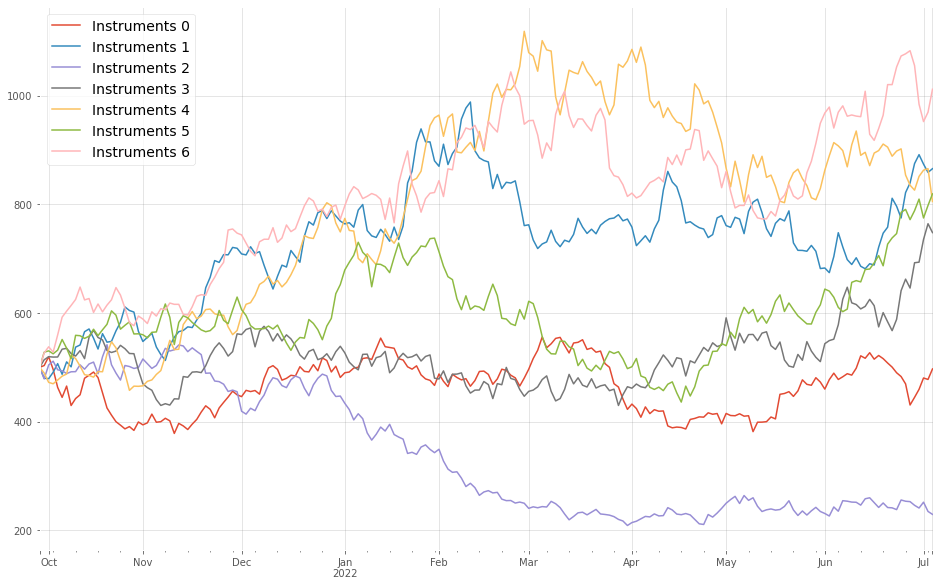

In [26]:
QF627_Financial_Timeseries_Date(rows,
                                columns,
                                freq).plot(figsize = (16, 10))

#### with pandas

> Vectorization with pandas is a powerful concept, in particular for the implementation of financial algorithms and vectorized backtesting.

> While NumPy brings general vectorization approaches to the numerical computing world of Python, pandas allows vectorization over time series data. 

> This is really helpful for the implementation of financial algorithms and the backtesting of algorithmic trading strategies.

> For a good comparison, let’s start with a two-dimensional ndarray object.

In [27]:
array_2D = np.arange(15).reshape(5, 3)
array_2D

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [28]:
COLUMNS = list("BTS")
COLUMNS

['B', 'T', 'S']

In [29]:
INDEX = pd.date_range("2021-09-29",
                      periods = 5,
                      freq = "B")
INDEX

DatetimeIndex(['2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04',
               '2021-10-05'],
              dtype='datetime64[ns]', freq='B')

In [30]:
DF = pd.DataFrame(array_2D,
                  columns = COLUMNS,
                  index = INDEX)
DF

,B,T,S
2021-09-29,0,1,2
2021-09-30,3,4,5
2021-10-01,6,7,8
2021-10-04,9,10,11
2021-10-05,12,13,14


In [31]:
5 * DF

,B,T,S
2021-09-29,0,5,10
2021-09-30,15,20,25
2021-10-01,30,35,40
2021-10-04,45,50,55
2021-10-05,60,65,70


In [32]:
DF.mean() # collapsing rows

B   6.000
T   7.000
S   8.000
dtype: float64

In [33]:
np.mean(DF)

B   6.000
T   7.000
S   8.000
dtype: float64

In [34]:
DF["B"] + DF["T"]

2021-09-29     1
2021-09-30     7
2021-10-01    13
2021-10-04    19
2021-10-05    25
Freq: B, dtype: int32

In [35]:
0.5 * DF.B + 3.2 * DF["T"] + DF.S

2021-09-29    5.200
2021-09-30   19.300
2021-10-01   33.400
2021-10-04   47.500
2021-10-05   61.600
Freq: B, dtype: float64

In [36]:
DF["T"] > 8

2021-09-29    False
2021-09-30    False
2021-10-01    False
2021-10-04     True
2021-10-05     True
Freq: B, Name: T, dtype: bool

In [37]:
(DF["T"] > 6) & (DF["T"] < 10)

2021-09-29    False
2021-09-30    False
2021-10-01     True
2021-10-04    False
2021-10-05    False
Freq: B, Name: T, dtype: bool

In [38]:
DF[(DF["B"] > 7) & (DF["B"] < 12)]

,B,T,S
2021-10-04,9,10,11


In [39]:
DF["T"] > DF["S"]

2021-09-29    False
2021-09-30    False
2021-10-01    False
2021-10-04    False
2021-10-05    False
Freq: B, dtype: bool

### Now, let's get back to our main game :)

#### Recall the log returns :)

In [40]:
USD_EUR["STRATEGY"] = USD_EUR["POSITIONS"].shift(1) * USD_EUR["RETURNS"]
# buy then rise, +1, sell then down, +1
USD_EUR

,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY
DATE,,,,,,
2013-09-27,1.354,1.334,1.312,1,NaN,NaN
2013-09-30,1.353,1.334,1.312,1,-0.000,-0.000
2013-10-01,1.353,1.335,1.313,1,-0.000,-0.000
2013-10-02,1.359,1.336,1.313,1,0.004,0.004
2013-10-03,1.364,1.336,1.313,1,0.004,0.004
...,...,...,...,...,...,...
2021-09-21,1.172,1.179,1.195,-1,-0.000,0.000
2021-09-22,1.174,1.179,1.195,-1,0.001,-0.001
2021-09-23,1.173,1.178,1.195,-1,-0.000,0.000


#### Derives the log returns of the strategy given the positionings and market returns.

In [41]:
USD_EUR[["RETURNS", "STRATEGY"]].sum()

RETURNS    -0.146
STRATEGY    0.262
dtype: float64

#### Sums up the single log return values for both the stock and the strategy (for learning purposes).

In [42]:
USD_EUR[["RETURNS", "STRATEGY"]].sum().apply(np.exp)

RETURNS    0.864
STRATEGY   1.300
dtype: float64

In [43]:
USD_EUR[["RETURNS", "STRATEGY"]].cumsum().apply(np.exp)

,RETURNS,STRATEGY
DATE,,
2013-09-27,NaN,NaN
2013-09-30,1.000,1.000
2013-10-01,1.000,1.000
2013-10-02,1.004,1.004
2013-10-03,1.008,1.008
...,...,...
2021-09-21,0.866,1.297
2021-09-22,0.867,1.296
2021-09-23,0.867,1.296


<AxesSubplot:xlabel='DATE'>

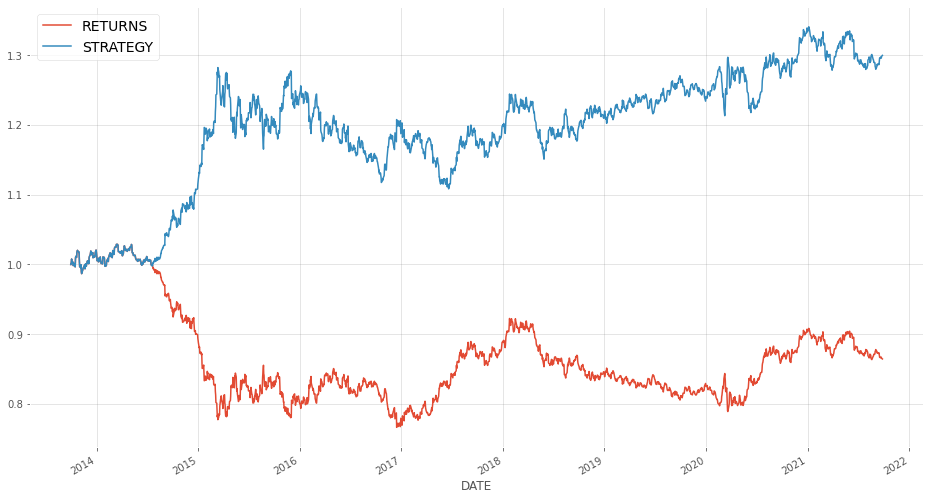

In [44]:
USD_EUR[["RETURNS", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16,9))

In [45]:
np.exp(USD_EUR[["RETURNS", "STRATEGY"]].mean() * 252) - 1

RETURNS    -0.018
STRATEGY    0.034
dtype: float64

In [46]:
USD_EUR[["RETURNS", "STRATEGY"]].std() * 252**0.5

RETURNS    0.076
STRATEGY   0.076
dtype: float64

In [47]:
(USD_EUR[["RETURNS", "STRATEGY"]].apply(np.exp) - 1).std() * 252**0.5

RETURNS    0.076
STRATEGY   0.076
dtype: float64

In [48]:
USD_EUR["CUMULATIVE_RETURNS"] = USD_EUR["STRATEGY"].cumsum().apply(np.exp)
USD_EUR

,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY,CUMULATIVE_RETURNS
DATE,,,,,,,
2013-09-27,1.354,1.334,1.312,1,NaN,NaN,NaN
2013-09-30,1.353,1.334,1.312,1,-0.000,-0.000,1.000
2013-10-01,1.353,1.335,1.313,1,-0.000,-0.000,1.000
2013-10-02,1.359,1.336,1.313,1,0.004,0.004,1.004
2013-10-03,1.364,1.336,1.313,1,0.004,0.004,1.008
...,...,...,...,...,...,...,...
2021-09-21,1.172,1.179,1.195,-1,-0.000,0.000,1.297
2021-09-22,1.174,1.179,1.195,-1,0.001,-0.001,1.296
2021-09-23,1.173,1.178,1.195,-1,-0.000,0.000,1.296


In [49]:
USD_EUR["MAX_GROSS_PERFORMANCE"] = USD_EUR["CUMULATIVE_RETURNS"].cummax()
USD_EUR

,PRICE,SMA_40,SMA_250,POSITIONS,RETURNS,STRATEGY,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE
DATE,,,,,,,,
2013-09-27,1.354,1.334,1.312,1,NaN,NaN,NaN,NaN
2013-09-30,1.353,1.334,1.312,1,-0.000,-0.000,1.000,1.000
2013-10-01,1.353,1.335,1.313,1,-0.000,-0.000,1.000,1.000
2013-10-02,1.359,1.336,1.313,1,0.004,0.004,1.004,1.004
2013-10-03,1.364,1.336,1.313,1,0.004,0.004,1.008,1.008
...,...,...,...,...,...,...,...,...
2021-09-21,1.172,1.179,1.195,-1,-0.000,0.000,1.297,1.341
2021-09-22,1.174,1.179,1.195,-1,0.001,-0.001,1.296,1.341
2021-09-23,1.173,1.178,1.195,-1,-0.000,0.000,1.296,1.341


<AxesSubplot:xlabel='DATE'>

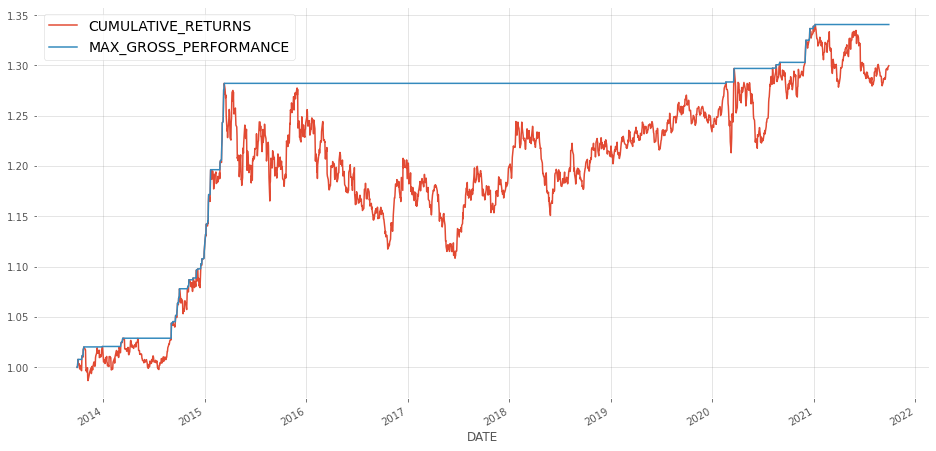

In [50]:
USD_EUR[["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]].dropna().plot(figsize = (16, 8))

> Recall the previous lesson: the maximum drawdown is then simply calculated as the maximum of the difference between the two relevant columns.

In [51]:
DRAWDOWN = USD_EUR["MAX_GROSS_PERFORMANCE"] - USD_EUR["CUMULATIVE_RETURNS"]

In [52]:
DRAWDOWN

DATE
2013-09-27     NaN
2013-09-30   0.000
2013-10-01   0.000
2013-10-02   0.000
2013-10-03   0.000
              ... 
2021-09-21   0.043
2021-09-22   0.045
2021-09-23   0.045
2021-09-24   0.042
2021-09-27   0.041
Length: 1998, dtype: float64

In [53]:
DRAWDOWN.max()

0.17382143166908337

> In this case, the maximum drawdown is about ____ percentage points.

> The longest drawdown period can be calculated using those dates at which the gross performance equals its cumulative maximum (namely, where a new maximum is set). Then the differences in days between all such dates are calculated, and the longest period comes out.

In [54]:
PERIOD = (DRAWDOWN[DRAWDOWN == 0].index[1:].to_pydatetime() - 
          DRAWDOWN[DRAWDOWN == 0].index[:-1].to_pydatetime())

In [55]:
PERIOD

array([datetime.timedelta(days=2), datetime.timedelta(days=1),
       datetime.timedelta(days=14), datetime.timedelta(days=1),
       datetime.timedelta(days=4), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=67),
       datetime.timedelta(days=66), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=2),
       datetime.timedelta(days=1), datetime.timedelta(days=4),
       datetime.timedelta(days=171), datetime.timedelta(days=5),
       datetime.timedelta(days=1), datetime.timedelta(days=9),
       datetime.timedelta(days=3), datetime.timedelta(days=2),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=4), datetime.timedelta(days=1),
       datetime.timedelta(days=2), datetime.timedelta(days=31),
       datetime.timedelta(days=3), datetime.timedelta(days=15),
       datetime.timedelta(days=11), datetime.timedelta(days=1),
       datetime.timedelta(days=2), datetime.tim

In [56]:
PERIOD.max()

datetime.timedelta(days=1804)

> The longest drawdown period lasts for _____________ days.

<a id="timeseries_momentum"></a>
### Time-series Momentum Strategy

> Cross-sectional momentum strategies, using a larger pool of instruments, buy those instruments that have recently performed better than their peers (and/or a benchmark) and sell those instruments that have underperformed. The strategies rely on the notion that instruments would continue to outperform and underperform, respectively—at least for a certain period of time.

    Time-series momentum strategies buy those instruments that have recently performed well and sell those instruments that have recently performed poorly. Here, the benchmark is the past returns of the instrument itself.

> The most simple time series momentum strategy is to buy the stock if the last return was positive and to sell it if it was negative. With NumPy and pandas, this is easy to formalize; just take the sign of the last available return as the market position.

In [57]:
S = ["SPY", "QQQ", "DIA"]

In [58]:
def obtain(S, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start,
                                  end = end)
              )
    OUR_DATA = map(data, S)
    return (pd.concat(OUR_DATA,
                      keys = S,
                      names = ["Ticker", "Date"])
           )

In [59]:
D = obtain(S,
           dt.datetime(2012,10,1),
           dt.datetime(2021,9,27))
D

High     Low    Open   Close        Volume  Adj Close
Ticker Date                                                               
SPY    2012-10-01 145.690 144.010 144.520 144.350 135911200.000    121.400
       2012-10-02 145.150 143.830 144.920 144.500 113422200.000    121.526
       2012-10-03 145.430 144.130 144.890 145.090 121283100.000    122.022
       2012-10-04 146.340 145.440 145.640 146.130 124311600.000    122.897
       2012-10-05 147.160 145.700 146.910 146.140 124842100.000    122.905
...                   ...     ...     ...     ...           ...        ...
DIA    2021-09-21 343.070 339.010 341.410 339.110   6071100.000    338.996
       2021-09-22 344.330 340.440 341.160 342.500   6862700.000    342.385
       2021-09-23 348.670 344.530 344.810 347.560   5592200.000    347.444
       2021-09-24 348.430 346.310 346.500 347.870   3121600.000    347.753
       2021-09-27 350.500 348.170 348.290 348.610   3426000.000    348.493

[6786 rows x 6 columns]

In [60]:
DCP = D[["Adj Close"]].reset_index().pivot("Date",
                                           "Ticker",
                                           "Adj Close")
DCP

Ticker,DIA,QQQ,SPY
Date,,,
2012-10-01,110.529,62.674,121.400
2012-10-02,110.283,62.857,121.526
2012-10-03,110.447,63.260,122.022
2012-10-04,111.135,63.479,122.897
2012-10-05,111.496,63.141,122.905
...,...,...,...
2021-09-21,338.996,366.150,433.630
2021-09-22,342.385,369.570,437.860
2021-09-23,347.444,372.980,443.180


In [61]:
QQQ = pd.DataFrame(DCP["QQQ"])
QQQ.rename(columns = {"QQQ": "PRICE"},
           inplace = True)

In [62]:
QQQ

,PRICE
Date,
2012-10-01,62.674
2012-10-02,62.857
2012-10-03,63.260
2012-10-04,63.479
2012-10-05,63.141
...,...
2021-09-21,366.150
2021-09-22,369.570
2021-09-23,372.980


In [63]:
QQQ["RETURNS"] = np.log(QQQ["PRICE"] / QQQ["PRICE"].shift(1))

In [64]:
QQQ["POSITION"] = np.sign(QQQ["RETURNS"]) 
# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.

In [65]:
QQQ["STRATEGY"] = QQQ["POSITION"].shift(1) * QQQ["RETURNS"]
# 今天的涨跌乘以昨天的仓位

<AxesSubplot:xlabel='Date'>

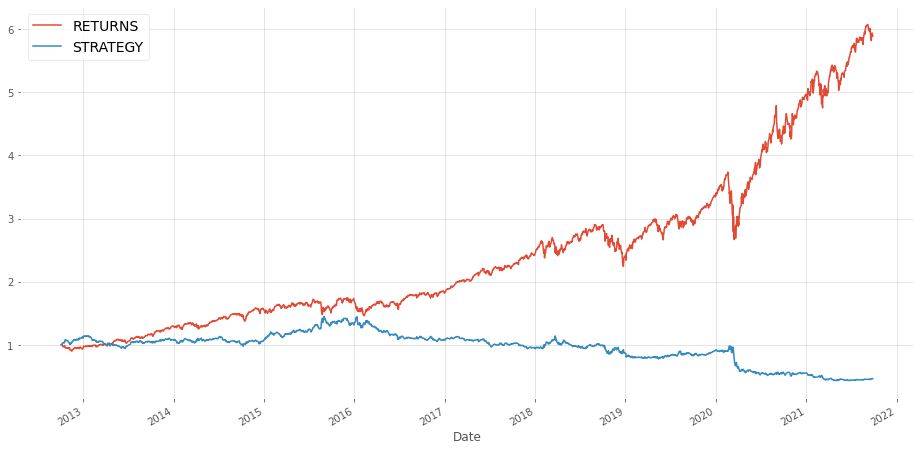

In [66]:
QQQ[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 8))

### Intraday stock prices

> Time series momentum could be arising intraday. In many cases, you could see that such momentum tends to be more pronounced intraday than interday.

> As a test case, let’s take a look at the gross performance of five time-series momentum strategies for one, three, five, seven, and nine return observations, respectively.

In [67]:
INTRAday = yf.download(tickers = "AAPL",
                       period = "1d",
                       interval = "1m",
                       auto_adjust = True
                       )

[*********************100%***********************]  1 of 1 completed


In [68]:
INTRAday

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-11-08 09:30:00-05:00,151.410,151.570,151.310,151.310,5022201
2021-11-08 09:31:00-05:00,151.320,151.420,151.220,151.350,373235
2021-11-08 09:32:00-05:00,151.352,151.382,151.140,151.170,282545
2021-11-08 09:33:00-05:00,151.170,151.270,151.050,151.170,303441
2021-11-08 09:34:00-05:00,151.125,151.220,151.021,151.130,272636
...,...,...,...,...,...
2021-11-08 15:55:00-05:00,150.520,150.520,150.420,150.425,189425
2021-11-08 15:56:00-05:00,150.425,150.460,150.390,150.420,245986
2021-11-08 15:57:00-05:00,150.420,150.450,150.400,150.410,248928


In [69]:
INTRAday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2021-11-08 09:30:00-05:00 to 2021-11-08 15:59:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    390 non-null    float64
 1   High    390 non-null    float64
 2   Low     390 non-null    float64
 3   Close   390 non-null    float64
 4   Volume  390 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 18.3 KB


In [70]:
INTRAday["RETURNS"] = np.log(INTRAday["Close"] / INTRAday["Close"].shift(1))
INTRAday

,Open,High,Low,Close,Volume,RETURNS
Datetime,,,,,,
2021-11-08 09:30:00-05:00,151.410,151.570,151.310,151.310,5022201,NaN
2021-11-08 09:31:00-05:00,151.320,151.420,151.220,151.350,373235,0.000
2021-11-08 09:32:00-05:00,151.352,151.382,151.140,151.170,282545,-0.001
2021-11-08 09:33:00-05:00,151.170,151.270,151.050,151.170,303441,-0.000
2021-11-08 09:34:00-05:00,151.125,151.220,151.021,151.130,272636,-0.000
...,...,...,...,...,...,...
2021-11-08 15:55:00-05:00,150.520,150.520,150.420,150.425,189425,-0.001
2021-11-08 15:56:00-05:00,150.425,150.460,150.390,150.420,245986,-0.000
2021-11-08 15:57:00-05:00,150.420,150.450,150.400,150.410,248928,-0.000


<AxesSubplot:title={'center':'QQQ INTRADAY'}, xlabel='Datetime'>

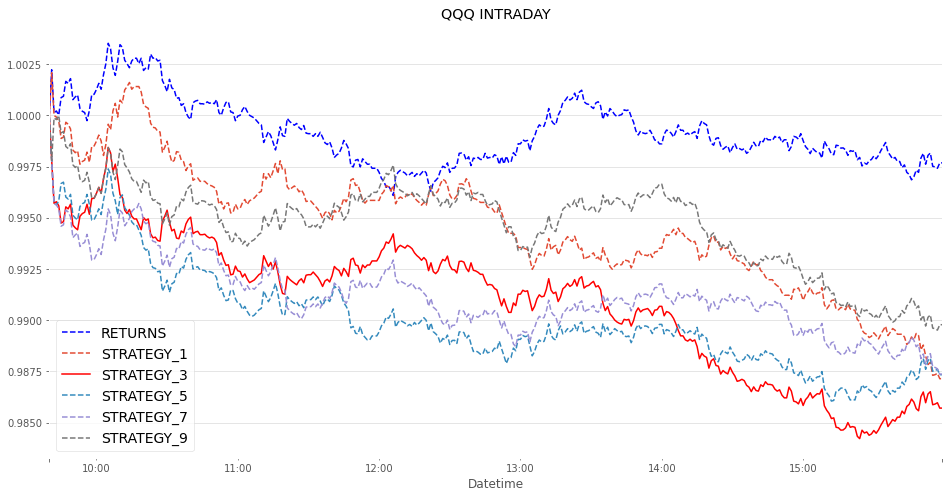

In [71]:
LIST_FOR_PLOT = ["RETURNS"]

for n in [1, 3, 5, 7, 9]:
    INTRAday["POSITION_%d" % n] = np.sign(INTRAday["RETURNS"].rolling(window = n).mean())
    INTRAday["STRATEGY_%d" % n] = (INTRAday["POSITION_%d" % n].shift(1) * INTRAday["RETURNS"])
    LIST_FOR_PLOT.append("STRATEGY_%d" % n)
    
INTRAday[LIST_FOR_PLOT].dropna().cumsum().apply(np.exp).plot(figsize = (16,8),
                                                             style = ["b--",
                                                                      "--",
                                                                      "r",
                                                                      "--",
                                                                      "--",
                                                                      "--"],
                                                             title = "QQQ INTRADAY")

<a id="mean_reversion"></a>
### Mean Reversion Strategy

> Mean reversion means a tendency of asset prices to return to a trend path. Mean-reversion strategies are based on the opposite belief to momentum strategies—that is, if a financial instrument has performed too well relative to its trend, it is shorted, and vice versa. While time-series momentum strategies expect a positive correlation between returns, mean-reversion strategies anticipate a negative correlation.

    Mean-reversion strategy utilizes a simple moving average (SMA) as a proxy for a trend path. The key is to define a threshold for the distance between the current stock price and the SMA, which serves as a signal for a long or short position.

In [72]:
G = pdr.get_data_yahoo("GDX",
                       start = dt.datetime(2012,10,1),
                       end = dt.datetime(2021,9,27))

In [73]:
G

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-01,54.610,53.700,54.210,53.930,10912600.000,50.628
2012-10-02,54.200,53.250,54.040,53.590,10223300.000,50.308
2012-10-03,53.680,52.620,53.680,52.720,11934900.000,49.492
2012-10-04,54.250,53.290,53.490,54.250,14103200.000,50.928
2012-10-05,54.640,53.420,53.990,53.650,12997100.000,50.365
...,...,...,...,...,...,...
2021-09-21,31.050,30.410,30.740,30.470,23278500.000,30.470
2021-09-22,31.240,30.460,30.700,30.500,26826400.000,30.500
2021-09-23,30.330,29.880,30.290,29.890,28658400.000,29.890


In [74]:
G["RETURNS"] = np.log(G["Close"] / G["Close"].shift(1))

In [75]:
G["SMA_22"] = G["Close"].rolling(window = 22).mean()
G

,High,Low,Open,Close,Volume,Adj Close,RETURNS,SMA_22
Date,,,,,,,,
2012-10-01,54.610,53.700,54.210,53.930,10912600.000,50.628,NaN,NaN
2012-10-02,54.200,53.250,54.040,53.590,10223300.000,50.308,-0.006,NaN
2012-10-03,53.680,52.620,53.680,52.720,11934900.000,49.492,-0.016,NaN
2012-10-04,54.250,53.290,53.490,54.250,14103200.000,50.928,0.029,NaN
2012-10-05,54.640,53.420,53.990,53.650,12997100.000,50.365,-0.011,NaN
...,...,...,...,...,...,...,...,...
2021-09-21,31.050,30.410,30.740,30.470,23278500.000,30.470,0.001,31.856
2021-09-22,31.240,30.460,30.700,30.500,26826400.000,30.500,0.001,31.840
2021-09-23,30.330,29.880,30.290,29.890,28658400.000,29.890,-0.020,31.739


> Here, let's set a threshold value(`T`) of `3` for the absolute deviation of the current price to deviate from the SMA to signal a positioning.

In [76]:
T = 3

G["DIST"] = G["Close"] - G["SMA_22"]

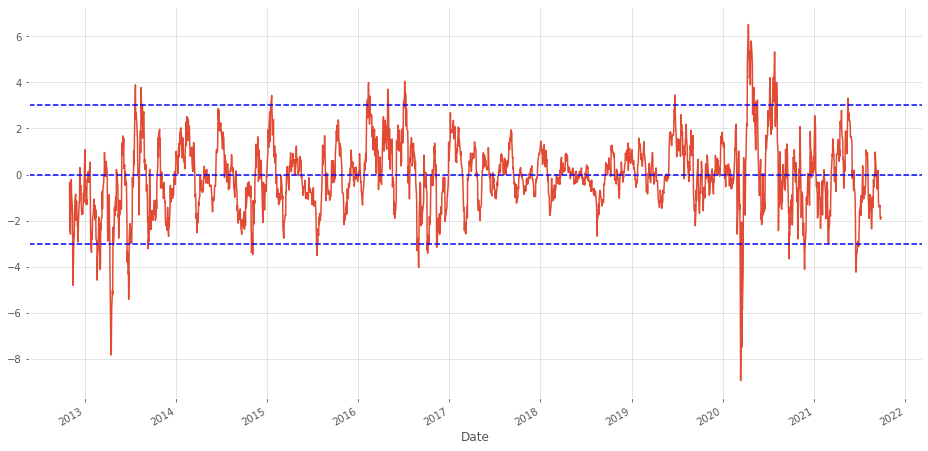

In [77]:
G["DIST"].dropna().plot(figsize = (16, 8))

plt.axhline(T, color = "blue", ls = "--")
plt.axhline(0, color = "blue", ls = "--")
plt.axhline(-T, color = "blue", ls = "--")

> Based on the differences and the fixed threshold values, positions can be created in vectorized fashion.

In [78]:
G["POSITIONS"] = np.where(G["DIST"] > T,
                          -1, np.nan)

In [79]:
G["POSITIONS"] = np.where(G["DIST"] < -T,
                          1, G["POSITIONS"])

In [80]:
G["POSITIONS"] = np.where(G["DIST"] * G["DIST"].shift(1) < 0,
                          0, G["POSITIONS"])

In [81]:
G

,High,Low,Open,Close,Volume,Adj Close,RETURNS,SMA_22,DIST,POSITIONS
Date,,,,,,,,,,
2012-10-01,54.610,53.700,54.210,53.930,10912600.000,50.628,NaN,NaN,NaN,NaN
2012-10-02,54.200,53.250,54.040,53.590,10223300.000,50.308,-0.006,NaN,NaN,NaN
2012-10-03,53.680,52.620,53.680,52.720,11934900.000,49.492,-0.016,NaN,NaN,NaN
2012-10-04,54.250,53.290,53.490,54.250,14103200.000,50.928,0.029,NaN,NaN,NaN
2012-10-05,54.640,53.420,53.990,53.650,12997100.000,50.365,-0.011,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,31.050,30.410,30.740,30.470,23278500.000,30.470,0.001,31.856,-1.386,NaN
2021-09-22,31.240,30.460,30.700,30.500,26826400.000,30.500,0.001,31.840,-1.340,NaN
2021-09-23,30.330,29.880,30.290,29.890,28658400.000,29.890,-0.020,31.739,-1.849,NaN


In [82]:
G["POSITIONS"] = G["POSITIONS"].ffill() 
# ffill: Synonym for DataFrame.fillna() with method='ffill'
# DataFrame.fillna(): Fill NA/NaN values using the specified method

In [83]:
G["POSITIONS"] = G["POSITIONS"].fillna(0)

In [84]:
G

,High,Low,Open,Close,Volume,Adj Close,RETURNS,SMA_22,DIST,POSITIONS
Date,,,,,,,,,,
2012-10-01,54.610,53.700,54.210,53.930,10912600.000,50.628,NaN,NaN,NaN,0.000
2012-10-02,54.200,53.250,54.040,53.590,10223300.000,50.308,-0.006,NaN,NaN,0.000
2012-10-03,53.680,52.620,53.680,52.720,11934900.000,49.492,-0.016,NaN,NaN,0.000
2012-10-04,54.250,53.290,53.490,54.250,14103200.000,50.928,0.029,NaN,NaN,0.000
2012-10-05,54.640,53.420,53.990,53.650,12997100.000,50.365,-0.011,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,31.050,30.410,30.740,30.470,23278500.000,30.470,0.001,31.856,-1.386,0.000
2021-09-22,31.240,30.460,30.700,30.500,26826400.000,30.500,0.001,31.840,-1.340,0.000
2021-09-23,30.330,29.880,30.290,29.890,28658400.000,29.890,-0.020,31.739,-1.849,0.000


<AxesSubplot:xlabel='Date'>

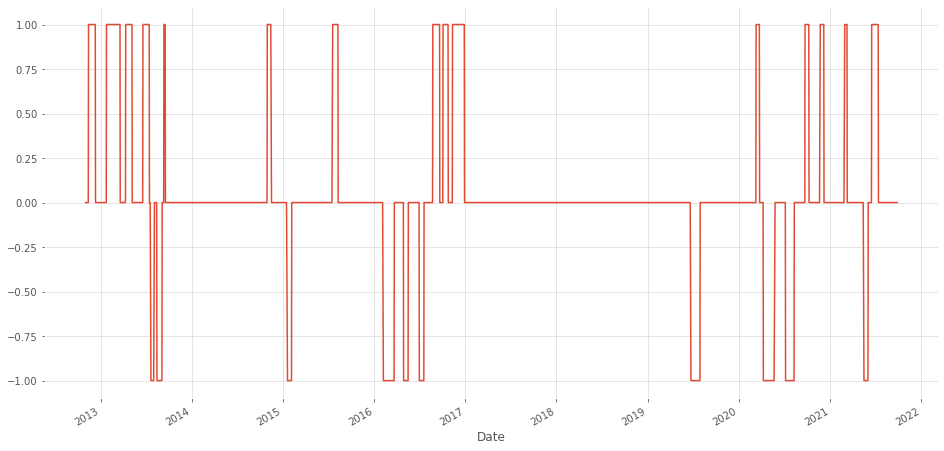

In [85]:
G["POSITIONS"].iloc[22: ].plot(figsize = (16, 8))

In [86]:
G["STRATEGY"] = G["POSITIONS"].shift(1) * G["RETURNS"]

<AxesSubplot:xlabel='Date'>

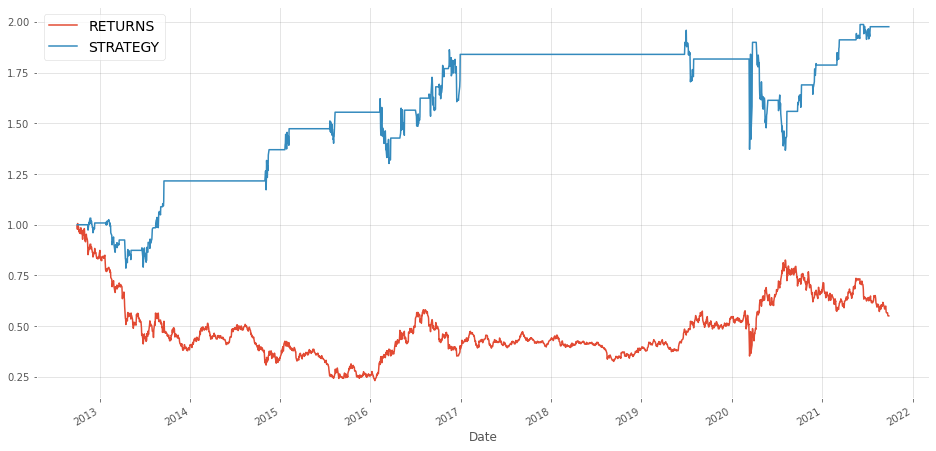

In [87]:
G[["RETURNS", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 8))

<a id="math_tools"></a>
## Some Useful Mathematical Tools

### Approximation

> Regression and interpolation are the most often used numerical techniques in quantitative finance.

In [88]:
def f(x):
    return np.sin(x) + 0.5 * x

In [89]:
def QF627_BTS(x,
              y,
              style,
              labels,
              axlabels):
    plt.figure(figsize = (16, 8))
    for i in range(len(x)):
                plt.plot(x[i],
                         y[i],
                         style[i],
                         label = labels[i],
                     )
                plt.xlabel(axlabels[0])
                plt.ylabel(axlabels[1])
                
    plt.legend(loc = 0)
    

In [90]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

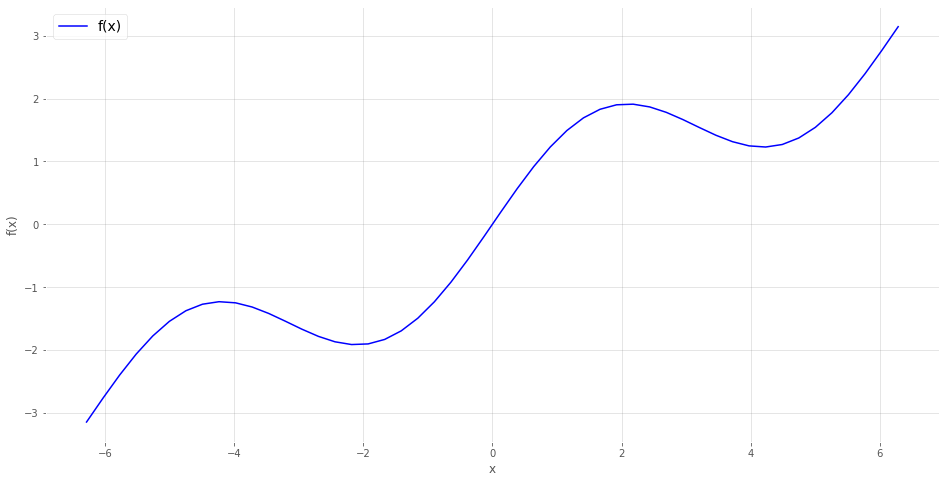

In [91]:
QF627_BTS([x],
          [f(x)],
          ["b"],
          ["f(x)"],
          ["x", "f(x)"])

### Regression

> Least-squares regression has ample areas of application, including simple function approximation as well as function approximation based on noisy or unsorted data. 

    These approaches can be applied to one-dimensional as well as multidimensional problems in quantitative finance. Because of underlying mathematics, the application is pretty much the same.

In [92]:
regression = np.polyfit(x, f(x), deg = 1, full = True)
regression

(array([ 4.288e-01, -5.103e-17]),
 array([21.032]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [93]:
regression_soulmate = np.polyval(regression[0],
                                 x)
regression_soulmate

array([-2.694, -2.585, -2.475, -2.365, -2.255, -2.145, -2.035, -1.925,
       -1.815, -1.705, -1.595, -1.485, -1.375, -1.265, -1.155, -1.045,
       -0.935, -0.825, -0.715, -0.605, -0.495, -0.385, -0.275, -0.165,
       -0.055,  0.055,  0.165,  0.275,  0.385,  0.495,  0.605,  0.715,
        0.825,  0.935,  1.045,  1.155,  1.265,  1.375,  1.485,  1.595,
        1.705,  1.815,  1.925,  2.035,  2.145,  2.255,  2.365,  2.475,
        2.585,  2.694])

In [94]:
np.mean((f(x) - regression_soulmate)**2)

0.4206477371868664

#### Monomials as Basis Functions

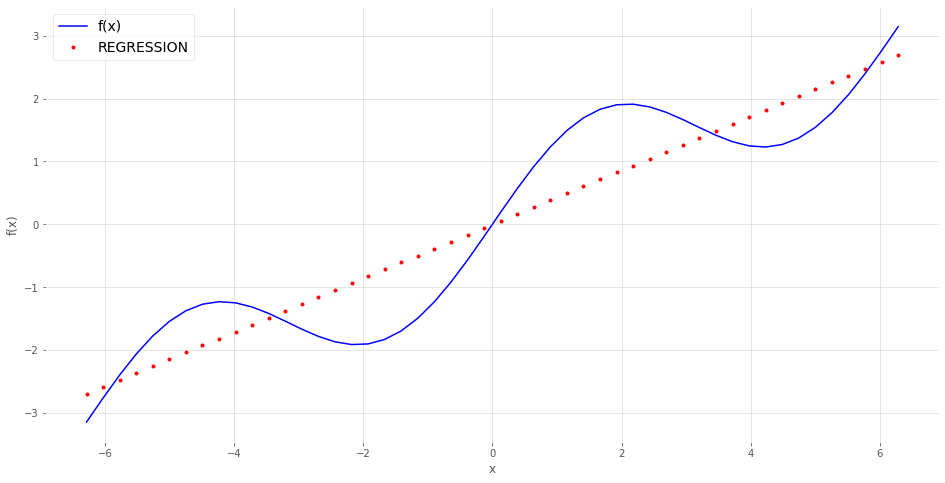

In [95]:
QF627_BTS([x, x],
          [f(x), regression_soulmate],
          ["b","r."],
          ["f(x)", "REGRESSION"],
          ["x", "f(x)"])

In [96]:
regression_degree_5 = np.polyfit(x, f(x), deg = 5)
regression_soulmate = np.polyval(regression_degree_5, x)

In [97]:
np.mean((f(x) - regression_soulmate) ** 2)

0.05388251552308737

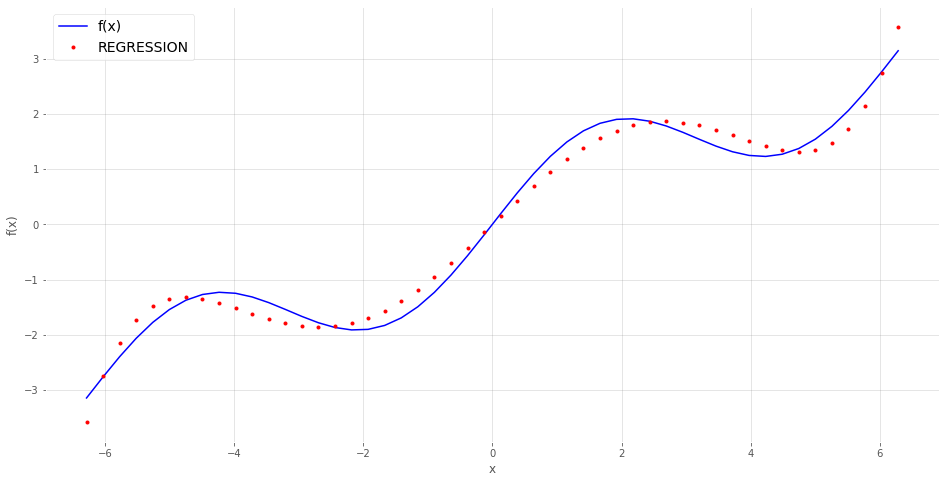

In [98]:
QF627_BTS([x, x],
          [f(x), regression_soulmate],
          ["b","r."],
          ["f(x)", "REGRESSION"],
          ["x", "f(x)"])

In [99]:
regression_degree_7 = np.polyfit(x, f(x), deg = 7)
regression_soulmate = np.polyval(regression_degree_7, x)
np.mean((f(x) - regression_soulmate) ** 2)

0.001776913475951788

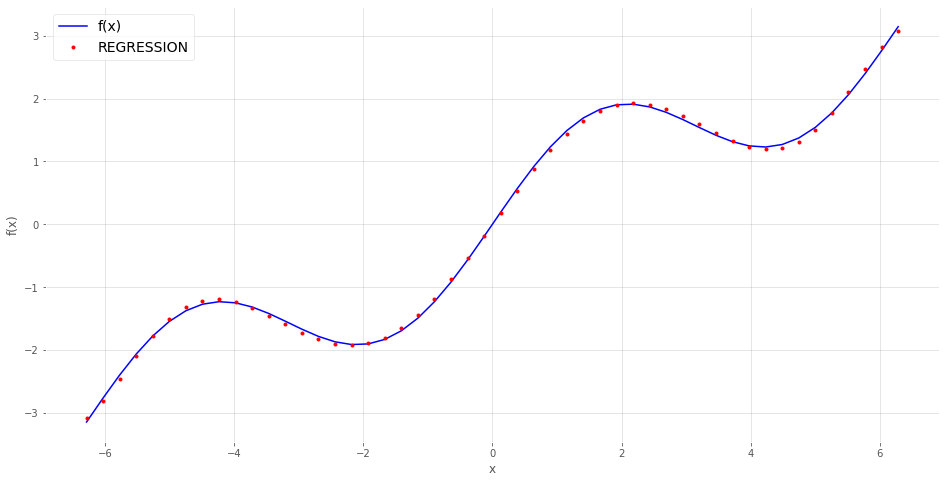

In [100]:
QF627_BTS([x, x],
          [f(x), regression_soulmate],
          ["b","r."],
          ["f(x)", "REGRESSION"],
          ["x", "f(x)"])

#### Individual Basis Functions

In [101]:
matrix = np.zeros((3+1, len(x)))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [102]:
matrix[3, :] = x **3
matrix[2, :] = x **2
matrix[1, :] = x **1
matrix[0, :] = 1

In [103]:
OLS = np.linalg.lstsq(matrix.T,
                      f(x),
                      rcond = None)[0] # reciprocal condition number

In [104]:
OLS.round(3)

array([ 0.   ,  0.563, -0.   , -0.005])

In [105]:
OLS_Y = np.dot(OLS,
               matrix)
OLS_Y

array([-2.188, -2.202, -2.203, -2.192, -2.169, -2.135, -2.09 , -2.034,
       -1.97 , -1.896, -1.813, -1.723, -1.625, -1.52 , -1.409, -1.293,
       -1.17 , -1.044, -0.913, -0.779, -0.641, -0.501, -0.359, -0.216,
       -0.072,  0.072,  0.216,  0.359,  0.501,  0.641,  0.779,  0.913,
        1.044,  1.17 ,  1.293,  1.409,  1.52 ,  1.625,  1.723,  1.813,
        1.896,  1.97 ,  2.034,  2.09 ,  2.135,  2.169,  2.192,  2.203,
        2.202,  2.188])

In [106]:
???

Object `?` not found.


In [107]:
matrix[3, :] = np.sin(x)

In [108]:
OLS = np.linalg.lstsq(matrix.T,
                      f(x),
                      rcond = True)[0]

In [109]:
OLS.round(3)

array([0. , 0.5, 0. , 1. ])

In [110]:
OLS_Y = np.dot(OLS,
               matrix)

In [111]:
np.allclose(f(x),
            OLS_Y)

True

In [112]:
np.mean((f(x) - OLS_Y) ** 2)

9.01766622280769e-31

In [113]:
QF627_BTS(???

SyntaxError: invalid syntax (<ipython-input-113-ff606fbf6112>, line 1)

#### Noisy Data

#### Unsorted Data

#### Multiple Dimensions

### Interpolation

> Compared with regression, interpolation is more involved mathematically and is also limited to low-dimensional problems. 

    The fundamental notion is to execute a regression between two neighboring data points in a way that not only are the data points perfectly matched by the resulting piecewise-defined interpolation function, but also the function is continuously differentiable at the data points.
    
> Continuous differentiability requires at least interpolation of degree 3; namely, with cubic splines. Yet, the approach also works in general with quadratic and even linear splines.

    You can anticipate better approximation results compared to a least-squares regression approach, under the circumstances where spline interpolation can be applied. Yet, recall that sorted (and “non-noisy”) data is required here. Importantly, the approach is limited to low-dimensional problems. It is also more computationally expensive.

#### Convex Optimization

#### Global Optimization

> In financial economics, convex optimization is important in calibrating option pricing models to market data or the optimization of an agent’s utility function. 

### Local Optimization

### Constrained Optimization

## Integration

> Integration is an important mathematical tool for valuation and option pricing. 

    This is because risk-neutral values of derivatives can be expressed in general as the discounted expectation of their payoff under the risk-neutral or martingale measure. As a result, the expectation is a sum in the discrete case, and an integral in the continuous case.

### Numerical Integration

### Integration by Simulation

## Symbolic Computation

### Basics

### Equations

### Integration and Differentiation

### Differentiation

> `Thank you for working with the script, Team 👍`